<a href="https://colab.research.google.com/github/Athira-gopinath/AthletsWinningPrediction-OlympicGames/blob/main/athlets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df=pd.read_csv('/content/athlete_events.csv')
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [5]:
df.isna().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

In [6]:
df.dtypes

ID          int64
Name       object
Sex        object
Age       float64
Height    float64
Weight    float64
Team       object
NOC        object
Games      object
Year        int64
Season     object
City       object
Sport      object
Event      object
Medal      object
dtype: object

(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 <BarContainer object of 10 artists>)

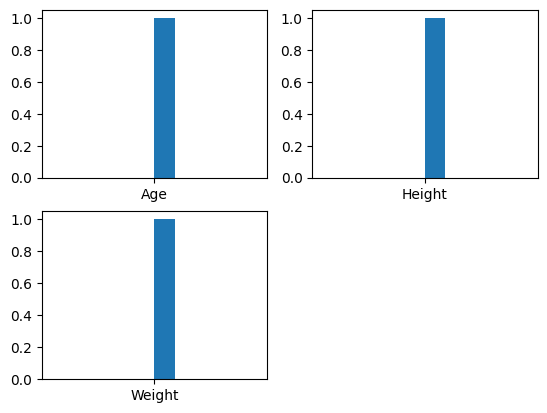

In [7]:
plt.subplot(2,2,1)
plt.hist('Age')
plt.subplot(2,2,2)
plt.hist('Height')
plt.subplot(2,2,3)
plt.hist('Weight')

In [8]:
df['Age']=df['Age'].fillna(df['Age'].median())
df['Height']=df['Height'].fillna(df['Height'].median())
df['Weight']=df['Weight'].fillna(df['Weight'].median())

In [9]:
fill_value='DNW'
df['Medal']=df['Medal'].fillna(fill_value)

In [10]:
df.isna().sum()

ID        0
Name      0
Sex       0
Age       0
Height    0
Weight    0
Team      0
NOC       0
Games     0
Year      0
Season    0
City      0
Sport     0
Event     0
Medal     0
dtype: int64

In [11]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,DNW
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,DNW
2,3,Gunnar Nielsen Aaby,M,24.0,175.0,70.0,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,DNW
3,4,Edgar Lindenau Aabye,M,34.0,175.0,70.0,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,DNW


In [12]:
df1=pd.read_csv('/content/noc_regions.csv')
df1.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [13]:
df1.drop('notes',axis=1,inplace=True)

In [14]:
df1.head()

,NOC,region
0,AFG,Afghanistan
1,AHO,Curacao
2,ALB,Albania
3,ALG,Algeria
4,AND,Andorra


In [15]:
df1.rename(columns={'region':'Country'},inplace=True)

In [16]:
df_merge=df.merge(df1,left_on='NOC',right_on='NOC',how='left')

In [17]:
df_merge.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Country
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,DNW,China
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,DNW,China
2,3,Gunnar Nielsen Aaby,M,24.0,175.0,70.0,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,DNW,Denmark
3,4,Edgar Lindenau Aabye,M,34.0,175.0,70.0,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,DNW,Netherlands


In [18]:
print(df_merge.loc[df_merge['Country'].isnull(),['NOC', 'Team']].drop_duplicates())

        NOC                      Team
578     SGP                 Singapore
6267    ROT  Refugee Olympic Athletes
44376   SGP              June Climene
61080   UNK                   Unknown
64674   TUV                    Tuvalu
80986   SGP                   Rika II
108582  SGP               Singapore-2
235895  SGP               Singapore-1


In [19]:
df_merge['Country']=np.where(df_merge['NOC']=='SGP','Singapore',df_merge['Country'])
df_merge['Country'] = np.where(df_merge['NOC']=='ROT', 'Refugee Olympic Athletes', df_merge['Country'])
df_merge['Country'] = np.where(df_merge['NOC']=='UNK', 'Unknown', df_merge['Country'])
df_merge['Country'] = np.where(df_merge['NOC']=='TUV', 'Tuvalu', df_merge['Country'])

In [20]:
df_merge.drop('Team', axis = 1, inplace = True)
df_merge.rename(columns = {'Country': 'Team'}, inplace = True)

In [21]:
print(df_merge.loc[df_merge['Team'].isnull(),['NOC', 'Team']].drop_duplicates())

Empty DataFrame
Columns: [NOC, Team]
Index: []


In [22]:
df_merge.head()

,ID,Name,Sex,Age,Height,Weight,NOC,Games,Year,Season,City,Sport,Event,Medal,Team
0,1,A Dijiang,M,24.0,180.0,80.0,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,DNW,China
1,2,A Lamusi,M,23.0,170.0,60.0,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,DNW,China
2,3,Gunnar Nielsen Aaby,M,24.0,175.0,70.0,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,DNW,Denmark
3,4,Edgar Lindenau Aabye,M,34.0,175.0,70.0,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,DNW,Netherlands


In [23]:
df_merge.isna().sum()

ID        0
Name      0
Sex       0
Age       0
Height    0
Weight    0
NOC       0
Games     0
Year      0
Season    0
City      0
Sport     0
Event     0
Medal     0
Team      0
dtype: int64

In [24]:
event_unique=df_merge.Event.nunique()

In [25]:
print(event_unique)

765


In [26]:
print(len(df_merge['Event']))

271116


In [27]:
df_merge.Event.nunique()

765

In [28]:
df_merge_summer=df_merge.loc[(df_merge['Year']>1960) & (df_merge['Season']=='Summer'),:]

In [29]:
print(df_merge_summer.head())

    ID                Name Sex   Age  Height  Weight  NOC        Games  Year  \
0    1           A Dijiang   M  24.0   180.0    80.0  CHN  1992 Summer  1992   
1    2            A Lamusi   M  23.0   170.0    60.0  CHN  2012 Summer  2012   
31  12   Jyri Tapani Aalto   M  31.0   172.0    70.0  FIN  2000 Summer  2000   
32  13  Minna Maarit Aalto   F  30.0   159.0    55.5  FIN  1996 Summer  1996   
33  13  Minna Maarit Aalto   F  34.0   159.0    55.5  FIN  2000 Summer  2000   

    Season       City       Sport                         Event Medal     Team  
0   Summer  Barcelona  Basketball   Basketball Men's Basketball   DNW    China  
1   Summer     London        Judo  Judo Men's Extra-Lightweight   DNW    China  
31  Summer     Sydney   Badminton       Badminton Men's Singles   DNW  Finland  
32  Summer    Atlanta     Sailing    Sailing Women's Windsurfer   DNW  Finland  
33  Summer     Sydney     Sailing    Sailing Women's Windsurfer   DNW  Finland  


In [30]:
df_merge_summer=df_merge_summer.reset_index()
print(df_merge_summer.head())

   index  ID                Name Sex   Age  Height  Weight  NOC        Games  \
0      0   1           A Dijiang   M  24.0   180.0    80.0  CHN  1992 Summer   
1      1   2            A Lamusi   M  23.0   170.0    60.0  CHN  2012 Summer   
2     31  12   Jyri Tapani Aalto   M  31.0   172.0    70.0  FIN  2000 Summer   
3     32  13  Minna Maarit Aalto   F  30.0   159.0    55.5  FIN  1996 Summer   
4     33  13  Minna Maarit Aalto   F  34.0   159.0    55.5  FIN  2000 Summer   

   Year  Season       City       Sport                         Event Medal  \
0  1992  Summer  Barcelona  Basketball   Basketball Men's Basketball   DNW   
1  2012  Summer     London        Judo  Judo Men's Extra-Lightweight   DNW   
2  2000  Summer     Sydney   Badminton       Badminton Men's Singles   DNW   
3  1996  Summer    Atlanta     Sailing    Sailing Women's Windsurfer   DNW   
4  2000  Summer     Sydney     Sailing    Sailing Women's Windsurfer   DNW   

      Team  
0    China  
1    China  
2  Finland 

In [31]:
event_list=df_merge_summer.Event.unique()

In [32]:
print(event_list)

["Basketball Men's Basketball" "Judo Men's Extra-Lightweight"
 "Badminton Men's Singles" "Sailing Women's Windsurfer"
 "Athletics Men's Shot Put" "Handball Women's Handball"
 "Weightlifting Women's Super-Heavyweight"
 "Wrestling Men's Light-Heavyweight, Greco-Roman"
 "Water Polo Men's Water Polo" 'Sailing Mixed Three Person Keelboat'
 "Hockey Women's Hockey" "Rowing Men's Lightweight Double Sculls"
 "Sailing Men's Two Person Dinghy" "Athletics Men's 1,500 metres"
 "Swimming Men's 100 metres Butterfly"
 "Swimming Men's 200 metres Butterfly"
 "Swimming Men's 4 x 100 metres Medley Relay" "Football Women's Football"
 'Equestrianism Mixed Jumping, Individual'
 "Boxing Men's Light-Welterweight" "Athletics Women's Javelin Throw"
 "Wrestling Men's Heavyweight, Freestyle"
 "Gymnastics Men's Individual All-Around"
 "Gymnastics Men's Floor Exercise" "Gymnastics Men's Parallel Bars"
 "Gymnastics Men's Horizontal Bar" "Gymnastics Men's Rings"
 "Gymnastics Men's Pommelled Horse" "Athletics Men's Pol

In [33]:
print(len(event_list))

372


In [34]:
df_merge_summer.isna().sum()

index     0
ID        0
Name      0
Sex       0
Age       0
Height    0
Weight    0
NOC       0
Games     0
Year      0
Season    0
City      0
Sport     0
Event     0
Medal     0
Team      0
dtype: int64

In [35]:
df_merge_summer.dtypes

index       int64
ID          int64
Name       object
Sex        object
Age       float64
Height    float64
Weight    float64
NOC        object
Games      object
Year        int64
Season     object
City       object
Sport      object
Event      object
Medal      object
Team       object
dtype: object

In [36]:
df_merge_summer.columns

Index(['index', 'ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal', 'Team'],
      dtype='object')

In [37]:
df_merge_summer['Medal_won']=np.where(df_merge_summer.loc[:,'Medal']=='DNW',0,df_merge_summer['Medal'])

In [38]:
df_merge_summer['Medal_won']=np.where(df_merge_summer.loc[:,'Medal_won']=='Bronze',1,df_merge_summer['Medal_won'])

In [39]:
df_merge_summer['Medal_won']=np.where(df_merge_summer.loc[:,'Medal_won']=='Silver',2,df_merge_summer['Medal_won'])

In [40]:
df_merge_summer['Medal_won']=np.where(df_merge_summer.loc[:,'Medal_won']=='Gold',3,df_merge_summer['Medal_won'])

In [41]:
print(df_merge_summer['Medal_won'].unique())

[0 3 1 2]


In [42]:
df_merge_summer.head()

,index,ID,Name,Sex,Age,Height,Weight,NOC,Games,Year,Season,City,Sport,Event,Medal,Team,Medal_won
0,0,1,A Dijiang,M,24.0,180.0,80.0,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,DNW,China,0
1,1,2,A Lamusi,M,23.0,170.0,60.0,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,DNW,China,0
2,31,12,Jyri Tapani Aalto,M,31.0,172.0,70.0,FIN,2000 Summer,2000,Summer,Sydney,Badminton,Badminton Men's Singles,DNW,Finland,0
3,32,13,Minna Maarit Aalto,F,30.0,159.0,55.5,FIN,1996 Summer,1996,Summer,Atlanta,Sailing,Sailing Women's Windsurfer,DNW,Finland,0
4,33,13,Minna Maarit Aalto,F,34.0,159.0,55.5,FIN,2000 Summer,2000,Summer,Sydney,Sailing,Sailing Women's Windsurfer,DNW,Finland,0


In [43]:
df_merge_summer.columns

Index(['index', 'ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal', 'Team',
       'Medal_won'],
      dtype='object')

In [44]:
df_merge_summer.head()

,index,ID,Name,Sex,Age,Height,Weight,NOC,Games,Year,Season,City,Sport,Event,Medal,Team,Medal_won
0,0,1,A Dijiang,M,24.0,180.0,80.0,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,DNW,China,0
1,1,2,A Lamusi,M,23.0,170.0,60.0,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,DNW,China,0
2,31,12,Jyri Tapani Aalto,M,31.0,172.0,70.0,FIN,2000 Summer,2000,Summer,Sydney,Badminton,Badminton Men's Singles,DNW,Finland,0
3,32,13,Minna Maarit Aalto,F,30.0,159.0,55.5,FIN,1996 Summer,1996,Summer,Atlanta,Sailing,Sailing Women's Windsurfer,DNW,Finland,0
4,33,13,Minna Maarit Aalto,F,34.0,159.0,55.5,FIN,2000 Summer,2000,Summer,Sydney,Sailing,Sailing Women's Windsurfer,DNW,Finland,0


In [45]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [46]:
df_merge_summer['Event_encoder']=le.fit_transform(df_merge_summer['Event'])
df_merge_summer['Team_encoder']=le.fit_transform(df_merge_summer['Team'])


In [47]:
df_merge_summer.head()

,index,ID,Name,Sex,Age,Height,Weight,NOC,Games,Year,Season,City,Sport,Event,Medal,Team,Medal_won,Event_encoder,Team_encoder
0,0,1,A Dijiang,M,24.0,180.0,80.0,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,DNW,China,0,61,39
1,1,2,A Lamusi,M,23.0,170.0,60.0,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,DNW,China,0,175,39
2,31,12,Jyri Tapani Aalto,M,31.0,172.0,70.0,FIN,2000 Summer,2000,Summer,Sydney,Badminton,Badminton Men's Singles,DNW,Finland,0,56,62
3,32,13,Minna Maarit Aalto,F,30.0,159.0,55.5,FIN,1996 Summer,1996,Summer,Atlanta,Sailing,Sailing Women's Windsurfer,DNW,Finland,0,235,62
4,33,13,Minna Maarit Aalto,F,34.0,159.0,55.5,FIN,2000 Summer,2000,Summer,Sydney,Sailing,Sailing Women's Windsurfer,DNW,Finland,0,235,62


In [48]:
Team=df_merge_summer[['Team','Team_encoder']].copy()

In [49]:
Team

,Team,Team_encoder
0,China,39
1,China,39
2,Finland,62
3,Finland,62
4,Finland,62
...,...,...
158143,Argentina,7
158144,USA,194
158145,Russia,152
158146,Russia,152


In [50]:
Team.drop_duplicates(subset='Team',inplace=True)

In [51]:
Team.sort_values('Team',ascending=True,inplace=True,axis=0,na_position='last')

In [52]:
Team.to_csv('Team.csv',index=False)

In [53]:
df_team=pd.read_csv('/content/Team.csv')

In [54]:
df_team

,Team,Team_encoder
0,Afghanistan,0
1,Albania,1
2,Algeria,2
3,American Samoa,3
4,Andorra,4
...,...,...
203,"Virgin Islands, British",203
204,"Virgin Islands, US",204
205,Yemen,205
206,Zambia,206


In [55]:
Event=df_merge_summer[['Event','Event_encoder']].copy()

In [56]:
Event.drop_duplicates(subset='Event',inplace=True)
Event.sort_values('Event',ascending=True,axis=0,inplace=True,na_position='last')

In [57]:
Event.to_csv('Event.csv',index=False)

In [58]:
df_event=pd.read_csv('/content/Event.csv')

In [59]:
df_event

,Event,Event_encoder
0,Archery Men's Individual,0
1,Archery Men's Team,1
2,Archery Women's Individual,2
3,Archery Women's Team,3
4,"Athletics Men's 1,500 metres",4
...,...,...
367,"Wrestling Women's Flyweight, Freestyle",367
368,"Wrestling Women's Heavyweight, Freestyle",368
369,"Wrestling Women's Light-Heavyweight, Freestyle",369
370,"Wrestling Women's Lightweight, Freestyle",370


In [60]:
df_merge_summer['Sexkeys']=le.fit_transform(df_merge_summer['Sex'])

In [61]:
Sexkeys=df_merge_summer[['Sex','Sexkeys']].copy()

In [62]:
Sexkeys.drop_duplicates(subset='Sex',inplace=True)
Sexkeys.sort_values('Sex',na_position='last',axis=0,inplace=True,ascending=True)

In [63]:
Sexkeys.to_csv('Sexkeys.csv',index=False)

In [64]:
df_sex=pd.read_csv('/content/Sexkeys.csv')

In [65]:
df_sex

,Sex,Sexkeys
0,F,0
1,M,1


In [66]:
df_merge_summer.columns

Index(['index', 'ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal', 'Team',
       'Medal_won', 'Event_encoder', 'Team_encoder', 'Sexkeys'],
      dtype='object')

In [67]:
df_merge_summer.drop(['index', 'ID', 'Name', 'Sex', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal', 'Team',],inplace=True,axis=1)

In [68]:
df_merge_summer

,Age,Height,Weight,Medal_won,Event_encoder,Team_encoder,Sexkeys
0,24.0,180.0,80.0,0,61,39,1
1,23.0,170.0,60.0,0,175,39,1
2,31.0,172.0,70.0,0,56,62,1
3,30.0,159.0,55.5,0,235,62,0
4,34.0,159.0,55.5,0,235,62,0
...,...,...,...,...,...,...,...
158143,27.0,168.0,76.0,0,173,7,1
158144,21.0,175.0,75.0,0,153,194,1
158145,24.0,183.0,72.0,0,201,152,1
158146,28.0,183.0,72.0,0,201,152,1


In [69]:
df_merge_summer.rename(columns={'Event_encoder':'Event','Team_encoder':'Team','Sexkeys':'Sex'},inplace=True)

In [70]:
df_merge_summer

,Age,Height,Weight,Medal_won,Event,Team,Sex
0,24.0,180.0,80.0,0,61,39,1
1,23.0,170.0,60.0,0,175,39,1
2,31.0,172.0,70.0,0,56,62,1
3,30.0,159.0,55.5,0,235,62,0
4,34.0,159.0,55.5,0,235,62,0
...,...,...,...,...,...,...,...
158143,27.0,168.0,76.0,0,173,7,1
158144,21.0,175.0,75.0,0,153,194,1
158145,24.0,183.0,72.0,0,201,152,1
158146,28.0,183.0,72.0,0,201,152,1


In [71]:
from sklearn.cluster import KMeans


In [72]:
df_merge_summer.describe()

,Age,Height,Weight,Event,Team,Sex
count,158148.000000,158148.000000,158148.000000,158148.000000,158148.000000,158148.000000
mean,24.953164,175.616302,70.671573,168.302464,104.400252,0.663613
std,5.638232,10.875392,14.727144,102.178203,61.654598,0.472475
min,11.000000,127.000000,25.000000,0.000000,0.000000,0.000000
25%,21.000000,168.000000,60.000000,79.000000,50.000000,0.000000
50%,24.000000,175.000000,70.000000,165.000000,90.000000,1.000000
75%,28.000000,183.000000,79.000000,263.000000,162.000000,1.000000
max,71.000000,226.000000,214.000000,371.000000,207.000000,1.000000


In [73]:
wcss=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
  kmeans.fit(df_merge_summer)
  wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Text(0, 0.5, 'wcss')

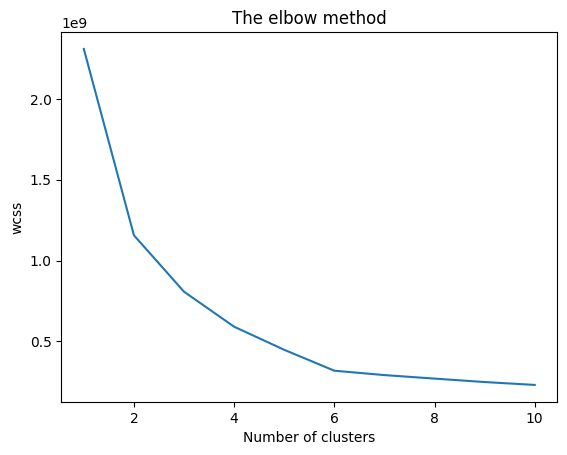

In [74]:
plt.plot(range(1,11),wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')

In [75]:
kmeans=KMeans(n_clusters=6,init='k-means++',random_state=42)
kmeans.fit(df_merge_summer)
y_kmeans=kmeans.predict(df_merge_summer)
y_kmeans

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 4, 1, ..., 2, 2, 1], dtype=int32)

In [76]:
from sklearn.metrics import silhouette_score
sil_avg=silhouette_score(df_merge_summer,y_kmeans)
sil_avg

0.4437462262042069

In [77]:
y_pred_new=kmeans.predict([[35.0,169.0,75.0,0,61,39,0]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


In [78]:
y_pred_new

array([1], dtype=int32)